In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
## print(os.listdir("../input"))
import seaborn as sns
from pandas.plotting import scatter_matrix
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler, MinMaxScaler, FunctionTransformer, OneHotEncoder, KBinsDiscretizer, MaxAbsScaler, LabelEncoder
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split as split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.mixture import GaussianMixture
from time import time
import pickle 

### Load Data from Pickle File

In [2]:
df = pd.read_pickle('my_df.pickle')
print(df.shape)

(713717, 23)


In [3]:
print(df.columns)

Index(['Year Type', 'Year', 'Organization Group Code', 'Organization Group',
       'Department Code', 'Department', 'Union Code', 'Union',
       'Job Family Code', 'Job Family', 'Job Code', 'Job',
       'Employee Identifier', 'Salaries', 'Overtime', 'Other Salaries',
       'Total Salary', 'Retirement', 'Health and Dental', 'Other Benefits',
       'Total Benefits', 'Total Compensation', 'Guaranteed Compensations'],
      dtype='object')


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 713717 entries, 0 to 835306
Data columns (total 23 columns):
Year Type                   713717 non-null object
Year                        713717 non-null int64
Organization Group Code     713717 non-null int64
Organization Group          713717 non-null object
Department Code             686417 non-null object
Department                  429330 non-null object
Union Code                  713156 non-null float64
Union                       713156 non-null object
Job Family Code             713717 non-null object
Job Family                  713717 non-null object
Job Code                    713717 non-null object
Job                         713717 non-null object
Employee Identifier         713717 non-null int64
Salaries                    713717 non-null float64
Overtime                    713717 non-null float64
Other Salaries              713717 non-null float64
Total Salary                713717 non-null float64
Retirement          

### Data Cleanup to address null values

In [5]:
#obj_df = df.select_dtypes(include=['object']).copy()
obj_df = df.copy(deep= True)
## Delete original dataframe to dave on memeory consumption
del df
print(obj_df.head())
print(obj_df.info())

  Year Type  Year  Organization Group Code             Organization Group  \
0  Calendar  2028                        7  General City Responsibilities   
1  Calendar  2028                        1              Public Protection   
2    Fiscal  2028                        1              Public Protection   
3  Calendar  2019                        7  General City Responsibilities   
4  Calendar  2019                        1              Public Protection   

  Department Code Department  Union Code                           Union  \
0          229259        NaN       792.0  Utd Pub EmpL790 SEIU-Crt Clrks   
1             CRT        NaN       792.0  Utd Pub EmpL790 SEIU-Crt Clrks   
2             CRT        NaN       792.0  Utd Pub EmpL790 SEIU-Crt Clrks   
3          232108        NaN       911.0                             POA   
4             DAT        NaN       311.0       Municipal Attorneys Assoc   

  Job Family Code       Job Family  ...   Salaries   Overtime  Other Salaries  \

In [6]:
obj_df[obj_df.isnull().any(axis=1)]

,Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,...,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation,Guaranteed Compensations
0,Calendar,2028,7,General City Responsibilities,229259,NaN,792.0,Utd Pub EmpL790 SEIU-Crt Clrks,0000,Untitled,...,674.28,0.00,5.76,680.04,130.91,0.00,53.86,184.77,864.81,859.05
1,Calendar,2028,1,Public Protection,CRT,NaN,792.0,Utd Pub EmpL790 SEIU-Crt Clrks,0000,Untitled,...,674.28,0.00,5.76,680.04,130.91,0.00,53.86,184.77,864.81,859.05
2,Fiscal,2028,1,Public Protection,CRT,NaN,792.0,Utd Pub EmpL790 SEIU-Crt Clrks,0000,Untitled,...,674.28,0.00,5.76,680.04,130.91,0.00,53.86,184.77,864.81,859.05
3,Calendar,2019,7,General City Responsibilities,232108,NaN,911.0,POA,Q000,Police Services,...,124709.01,100499.62,5501.78,230710.41,23271.86,14293.60,3934.00,55975.56,286685.97,180684.57
4,Calendar,2019,1,Public Protection,DAT,NaN,311.0,Municipal Attorneys Assoc,8100,Legal & Court,...,155489.01,0.00,1500.00,156989.01,29239.75,14308.46,11100.60,69326.83,226315.84,224815.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583458,Fiscal,2016,5,Culture & Recreation,REC,REC Recreation & Park Commsn,NaN,NaN,3200,Recreation,...,1394.40,0.00,32.26,1426.66,313.73,517.48,110.54,941.75,2368.41,2336.15
584393,Fiscal,2016,2,"Public Works, Transportation & Commerce",MTA,MTA Municipal Transprtn Agncy,NaN,NaN,9100,Street Transit,...,32013.30,5983.84,2426.29,40423.43,6324.89,4439.12,3245.97,14009.98,54433.41,46023.28
586221,Fiscal,2016,5,Culture & Recreation,REC,REC Recreation & Park Commsn,NaN,NaN,3200,Recreation,...,4834.20,0.00,112.23,4946.43,1087.72,1794.04,394.55,3276.31,8222.74,8110.51
586532,Fiscal,2016,2,"Public Works, Transportation & Commerce",MTA,MTA Municipal Transprtn Agncy,NaN,NaN,9100,Street Transit,...,11840.00,476.70,601.99,12918.69,2316.75,1995.11,1058.78,5370.64,18289.33,17210.64


In [7]:
obj_df["Year"] = obj_df["Year"].astype(int)
print(obj_df[obj_df.Year > 2019]['Year'].count())
obj_df.drop(obj_df.loc[obj_df.Year > 2019].index, inplace=True)
print(obj_df[obj_df.Year > 2019]['Year'].count())

3
0


In [8]:
print("Number of Nulls: ", obj_df["Department Code"].isnull().sum())
print(obj_df["Department Code"].value_counts())
obj_df = obj_df.fillna({"Department Code": "DPH"})
print("Number of Nulls: ", obj_df["Department Code"].isnull().sum())

Number of Nulls:  27300
DPH       135700
MTA        89283
POL        48464
DSS        34932
REC        34917
           ...  
232395        21
229261        21
232076        16
229047        14
232051         8
Name: Department Code, Length: 111, dtype: int64
Number of Nulls:  0


In [9]:
print("Number of Nulls: ", obj_df["Department"].isnull().sum())
#print(obj_df[obj_df["Department"].isnull()]['Department Code'].notnull().count())
#obj_df[obj_df["Department"].isnull()]['Department Code'].notnull()
#print(obj_df["Department"].value_counts())
#obj_df = obj_df.fillna({"Department": "DPH"})
obj_df.dropna(subset=['Department'], how='all', inplace=True)
obj_df.reset_index(drop=True)
print("Number of Nulls: ", obj_df["Department"].isnull().sum())
print(obj_df.shape)
print(obj_df[obj_df.isnull().any(axis=1)])

Number of Nulls:  284384
Number of Nulls:  0
(429330, 23)
       Year Type  Year  Organization Group Code  \
300980  Calendar  2017                        2   
301255  Calendar  2017                        5   
301594  Calendar  2017                        5   
303128  Calendar  2017                        5   
303132  Calendar  2017                        5   
...          ...   ...                      ...   
583458    Fiscal  2016                        5   
584393    Fiscal  2016                        2   
586221    Fiscal  2016                        5   
586532    Fiscal  2016                        2   
586897    Fiscal  2016                        5   

                             Organization Group Department Code  \
300980  Public Works, Transportation & Commerce             MTA   
301255                     Culture & Recreation             REC   
301594                     Culture & Recreation             REC   
303128                     Culture & Recreation             R

In [10]:
print("Number of Nulls: ", obj_df["Union"].isnull().sum())
#print(obj_df["Union"].value_counts())
obj_df.dropna(subset=['Union'], how='all', inplace=True)
obj_df.reset_index(drop=True)
print("Number of Nulls: ", obj_df["Union"].isnull().sum())
print(obj_df.shape)

Number of Nulls:  561
Number of Nulls:  0
(428769, 23)


In [11]:
obj_df[obj_df.isnull().any(axis=1)]

,Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,...,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation,Guaranteed Compensations


obj_df["Year Type"] = obj_df["Year Type"].astype('category').cat.codes
obj_df["Organization Group"] = obj_df["Organization Group"].astype('category').cat.codes
obj_df["Job Family Code"] = obj_df["Job Family Code"].astype('category').cat.codes
obj_df["Job Family"] = obj_df["Job Family"].astype('category').cat.codes
obj_df["Job Code"] = obj_df["Job Code"].astype('category').cat.codes
obj_df["Job"] = obj_df["Job"].astype('category').cat.codes
obj_df["Department Code"] = obj_df["Department Code"].astype('category').cat.codes
obj_df["Union"] = obj_df["Union"].astype('category').cat.codes
obj_df["Department"] = obj_df["Department"].astype('category').cat.codes
#obj_df['Year'] = pd.to_datetime(obj_df.Year, format='%Y')

obj_df["Year Type"] = obj_df["Year Type"].astype('str')
obj_df["Organization Group"] = obj_df["Organization Group"].astype('str')
obj_df["Job Family Code"] = obj_df["Job Family Code"].astype('str')
obj_df["Job Family"] = obj_df["Job Family"].astype('str')
obj_df["Job Code"] = obj_df["Job Code"].astype('str')
obj_df["Job"] = obj_df["Job"].astype('str')
obj_df["Department Code"] = obj_df["Department Code"].astype('str')
obj_df["Union"] = obj_df["Union"].astype('str')
obj_df["Department"] = obj_df["Department"].astype('str')
obj_df['Year'] = pd.to_datetime(obj_df.Year, format='%Y')

In [12]:
obj_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 428769 entries, 300572 to 835306
Data columns (total 23 columns):
Year Type                   428769 non-null object
Year                        428769 non-null int64
Organization Group Code     428769 non-null int64
Organization Group          428769 non-null object
Department Code             428769 non-null object
Department                  428769 non-null object
Union Code                  428769 non-null float64
Union                       428769 non-null object
Job Family Code             428769 non-null object
Job Family                  428769 non-null object
Job Code                    428769 non-null object
Job                         428769 non-null object
Employee Identifier         428769 non-null int64
Salaries                    428769 non-null float64
Overtime                    428769 non-null float64
Other Salaries              428769 non-null float64
Total Salary                428769 non-null float64
Retirement     

##Approach 1:
 ### Convert the "Total Compensation" to a Label Column with 10 classes and 
 ### then use other features to classify the test data.

#obj_df.dropna(subset=['genres', 'directors', 'writers', 'startYear'], inplace = True)

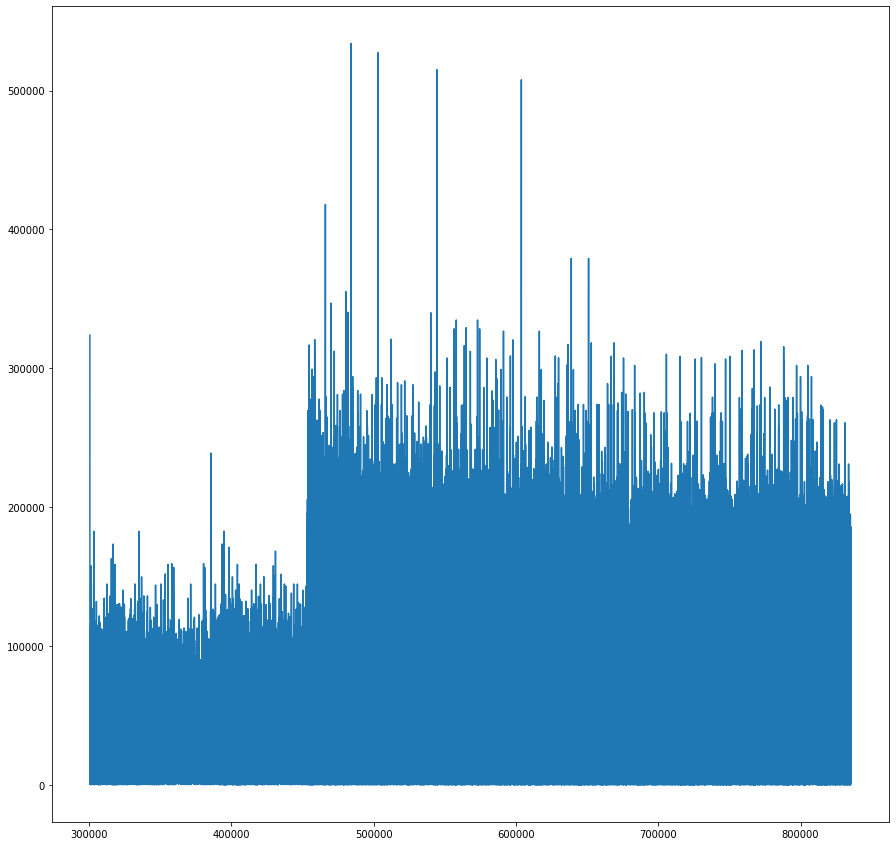

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,15))
plt.plot(obj_df['Salaries'])
plt.show()

In [14]:
total_salary_description = obj_df['Salaries'].describe()
print(total_salary_description)
print(obj_df['Salaries'].isnull().sum())

count    428769.000000
mean      62014.660909
std       43678.115052
min           0.030000
25%       25599.810000
50%       60050.730000
75%       89590.710000
max      533985.940000
Name: Salaries, dtype: float64
0


In [15]:
def convrt_to_cat_val(num):
    x = ''
    if 0<= num <= 25000:
        x = "Low"
    elif 25000 < num <= 50000:
        x = "Average"
    elif 50000 < num <= 75000:
        x = "Above Average"
    elif 75000 < num <= 100000:
        x = "Good"
    elif 100000 < num <= 150000:
        x = "Very Good"
    elif num > 150000:
        x = "Exceptional"
    else: 
        x = "Unknown"
    return x

In [16]:
# Converting the Average Rating to Bins which are equally distributed. 
obj_df['Salaries_eq_bin'] = obj_df['Salaries'].apply(lambda x: convrt_to_cat_val(x))
print(obj_df.shape)

(428769, 24)


In [17]:
print(np.unique(obj_df['Salaries_eq_bin']))

['Above Average' 'Average' 'Exceptional' 'Good' 'Low' 'Very Good']


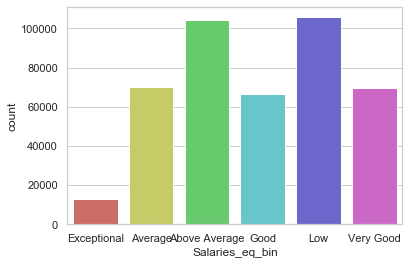

In [18]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

#draw histogram plot
sns.countplot(obj_df['Salaries_eq_bin'], palette = 'hls')
plt.show()

library for plots
import seaborn as sns
import matplotlib.pyplot as plt
 
Basic correlogram
sns.pairplot(obj_df)
plt.show()

corr = obj_df.corr()
corr.style.background_gradient(cmap='coolwarm')

import pickle
obj_df.to_pickle('my_ready_df.pickle')
##del obj_df

import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
!pip install imblearn
from imblearn.over_sampling import SMOTE
df = pd.read_pickle('my_ready_df.pickle')

In [19]:
#Due to memory limitation, I am slicing the dtaframe to 20% of the data.
from sklearn.utils import shuffle
#df = shuffle(obj_df)
df1 = obj_df.sample(frac=0.25).reset_index(drop=True)
print(obj_df.shape)
print(df1.shape)

(428769, 24)
(107192, 24)


In [20]:
print(df1.info())
print(df1.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107192 entries, 0 to 107191
Data columns (total 24 columns):
Year Type                   107192 non-null object
Year                        107192 non-null int64
Organization Group Code     107192 non-null int64
Organization Group          107192 non-null object
Department Code             107192 non-null object
Department                  107192 non-null object
Union Code                  107192 non-null float64
Union                       107192 non-null object
Job Family Code             107192 non-null object
Job Family                  107192 non-null object
Job Code                    107192 non-null object
Job                         107192 non-null object
Employee Identifier         107192 non-null int64
Salaries                    107192 non-null float64
Overtime                    107192 non-null float64
Other Salaries              107192 non-null float64
Total Salary                107192 non-null float64
Retirement          

In [21]:
#X = df1.drop(columns=['Salaries_eq_bin'])
X = df1[['Year Type', 'Year', 'Organization Group Code', 'Organization Group',
       'Department Code', 'Department', 'Union Code', 'Union',
       'Job Family Code', 'Job Family', 'Job Code', 'Job', 'Overtime', 'Other Salaries', 'Retirement', 'Health and Dental', 'Other Benefits',
       'Total Benefits', 'Guaranteed Compensations']].copy(deep=True)
print(X.info())
y = df1[['Salaries_eq_bin']].copy(deep=True)
print(y.isnull().sum())
print(np.unique(df1[['Salaries_eq_bin']]))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107192 entries, 0 to 107191
Data columns (total 19 columns):
Year Type                   107192 non-null object
Year                        107192 non-null int64
Organization Group Code     107192 non-null int64
Organization Group          107192 non-null object
Department Code             107192 non-null object
Department                  107192 non-null object
Union Code                  107192 non-null float64
Union                       107192 non-null object
Job Family Code             107192 non-null object
Job Family                  107192 non-null object
Job Code                    107192 non-null object
Job                         107192 non-null object
Overtime                    107192 non-null float64
Other Salaries              107192 non-null float64
Retirement                  107192 non-null float64
Health and Dental           107192 non-null float64
Other Benefits              107192 non-null float64
Total Benefits    

In [22]:
df1[df1.isnull().any(axis=1)]

,Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,...,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation,Guaranteed Compensations,Salaries_eq_bin


In [23]:
from sklearn.model_selection import train_test_split

## Feature Selection
ratio_train = 0.8
ratio_val = 0.1
ratio_test = 0.1

# Produces test split.
x_remaining, X_test, y_remaining, y_test = train_test_split(X, y, test_size=ratio_test)

# Adjusts val ratio, w.r.t. remaining dataset.
ratio_remaining = 1 - ratio_test
ratio_val_adjusted = ratio_val / ratio_remaining

# Produces train and val splits.
X_train, X_val, y_train, y_val = train_test_split(
    x_remaining, y_remaining, test_size=ratio_val_adjusted)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80, random_state=42)

In [24]:
# Categorical boolean mask
categorical_feature_mask = X.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = X.columns[categorical_feature_mask].tolist()
print(categorical_cols)

['Year Type', 'Organization Group', 'Department Code', 'Department', 'Union', 'Job Family Code', 'Job Family', 'Job Code', 'Job']


In [25]:
# import labelencoder
from sklearn.preprocessing import LabelEncoder# instantiate labelencoder object
le = LabelEncoder()

In [26]:
# apply le on categorical feature columns
X_train[categorical_cols] = X_train[categorical_cols].apply(lambda col: le.fit_transform(col))
X_test[categorical_cols] = X_test[categorical_cols].apply(lambda col: le.fit_transform(col))
X_val[categorical_cols] = X_val[categorical_cols].apply(lambda col: le.fit_transform(col))

y_train['Salaries_eq_bin'] = le.fit_transform(y_train['Salaries_eq_bin'])
y_test['Salaries_eq_bin'] = le.fit_transform(y_test['Salaries_eq_bin'])
y_val['Salaries_eq_bin'] = le.fit_transform(y_val['Salaries_eq_bin'])

print(X_train[categorical_cols].head(10))
print(y_train['Salaries_eq_bin'].head(10))

        Year Type  Organization Group  Department Code  Department  Union  \
12941           1                   6               37          39     73   
24150           1                   0               20          20     61   
56346           0                   0               20          20     60   
50474           0                   1               35          37     36   
101142          1                   5               14          14     52   
70605           1                   5               41          42     47   
85842           0                   4               22          34     54   
47953           1                   5               28          27     18   
30390           0                   6               29          30     36   
56126           0                   2                7           8     32   

        Job Family Code  Job Family  Job Code   Job  
12941                47          52       964  1038  
24150                13          31      107

/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [27]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=True, categorical_features = categorical_feature_mask, handle_unknown='ignore', drop=None)
print("categories: " , ohe)
X_train_ohe = ohe.fit_transform(X_train)
#print(X_train_ohe)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


categories:  OneHotEncoder(categorical_features=Year Type                    True
Year                        False
Organization Group Code     False
Organization Group           True
Department Code              True
Department                   True
Union Code                  False
Union                        True
Job Family Code              True
Job Family                   True
Job Code                     True
Job                          True
Overtime                    False
Other Salaries              False
Retirement                  False
Health and Dental           False
Other Benefits              False
Total Benefits              False
Guaranteed Compensations    False
dtype: bool,
              categories=None, drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='ignore', n_values=None, sparse=True)


In [28]:
X_test_ohe = ohe.transform(X_test)
#print(X_test_ohe)

In [29]:
X_val_ohe = ohe.transform(X_val)
#print(X_val_ohe)

In [30]:
def display_shape(dframe):
    nRow, nCol = dframe.shape
    print(f'There are {nRow} rows and {nCol} columns')

#print(X_train_ohe.shape)
#print(X_test_ohe.shape)
#print(X_val_ohe.shape)
#print(y_train.shape)
#print(y_test.shape)
#print(y_val.shape)
display_shape(X_train_ohe)
display_shape(X_test_ohe)
display_shape(X_val_ohe)
display_shape(y_train)
display_shape(y_test)
display_shape(y_val)

There are 85752 rows and 2498 columns
There are 10720 rows and 2498 columns
There are 10720 rows and 2498 columns
There are 85752 rows and 1 columns
There are 10720 rows and 1 columns
There are 10720 rows and 1 columns


column_name = ohe.get_feature_names(['Overtime', 
         'Other Salaries','Health and Dental', 'Other Benefits',
       'Total Benefits', 'Total Compensation', 'Guaranteed Compensations'])
one_hot_encoded_frame =  pd.DataFrame(X_train_ohe, columns= column_name)
print(one_hot_encoded_frame.head)

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_20newsgroups_vectorized 
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import pandas as pd
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn.utils import class_weight
h = .02  # step size in the mesh

In [32]:
from sklearn.metrics import confusion_matrix
def execute_model(names,classifiers):
    i = 1
    # iterate over datasets
    results = {}
    #class_weights = class_weight.compute_class_weight('balanced',np.unique(y_train), y_train)
    for name, clf in zip(names, classifiers):
        import time        
        cur_time = time.time()
        clf.fit(X_train_ohe, y_train.values.ravel())
        #clf.fit(X_train_ohe, y_train, sample_weight = class_weights)
        training_time = time.time() - cur_time
        cur_time = time.time()
        score = clf.score(X_test_ohe, y_test.values.ravel())
        testing_time = time.time() - cur_time
        
        cur_time = time.time()
        train_accuracy = clf.score(X_train_ohe, y_train.values.ravel())
        scoring = ['precision_macro', 'recall_macro']
        scores = cross_validate(clf, X_val_ohe, y_val.values.ravel(), scoring = scoring, cv=2)
        sorted(scores.keys())
        score_time = time.time() - cur_time
        print(name)
        print(scores)
        #print("Cross Validation Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
        results[name] = [training_time, testing_time, score_time, train_accuracy, score]
        i += 1
        print('executing: ' + name)
        dfk = pd.DataFrame.from_dict(
            results, orient='index',
            columns=['Train Time', 'Test Time', 'Cross validation Time','Train Acc', 'Test Acc'])
    display(dfk)

In [33]:
import random
#XGBClassifier
#https://www.kaggle.com/stuarthallows/using-xgboost-with-scikit-learn
#!pip install xgboost
from xgboost import XGBClassifier as xgb
names = ["XGBClassifier"]
xgb_params = {'learning_rate': 0.25, 
              'max_depth': 15,
              'subsample': 0.5,        
              'colsample_bytree': 0.9,
              'objective': 'multi:softmax',
              'silent': 1, 
              'n_estimators':190,
              'scale_pos_weight': 0.8,
              'gamma':6,         
              'min_child_weight':8,
              "subsample": random.uniform(0.6, 0.4),
              'eta':1
            }   

classifiers = [xgb(**xgb_params, seed = 10, num_boost_round=10, nfold=5,
             metrics={'error'})]
execute_model(names,classifiers)

XGBClassifier
{'fit_time': array([20.56941414, 20.42533398]), 'score_time': array([0.22425604, 0.17624426]), 'test_precision_macro': array([0.95488035, 0.96120974]), 'test_recall_macro': array([0.95261916, 0.96301077])}
executing: XGBClassifier


,Train Time,Test Time,Cross validation Time,Train Acc,Test Acc
XGBClassifier,297.717277,0.212527,43.112667,0.995464,0.991325


In [34]:
namesAll = ["Decision Tree", 
            "Random Forest", 
            "Neural Net", 
            "AdaBoost",
            "Nearest Neighbors",
            "RBF SVM", 
            "Linear SVM"]
            

classifiersAll = [DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    KNeighborsClassifier(3),
    SVC(gamma=1, C=0.8, class_weight="balanced"),
    SVC(kernel="linear", C=0.25, class_weight="balanced", random_state=0)]

In [35]:
execute_model(namesAll,classifiersAll)

Decision Tree
{'fit_time': array([0.04305792, 0.04152203]), 'score_time': array([0.00693703, 0.00748205]), 'test_precision_macro': array([0.9477451 , 0.94634365]), 'test_recall_macro': array([0.94364373, 0.95145523])}
executing: Decision Tree


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Random Forest
{'fit_time': array([0.02686524, 0.02423286]), 'score_time': array([0.02254581, 0.01987004]), 'test_precision_macro': array([0.48739044, 0.48703082]), 'test_recall_macro': array([0.33014037, 0.2098799 ])}
executing: Random Forest
Neural Net
{'fit_time': array([7.70464396, 4.49593806]), 'score_time': array([0.0271821 , 0.02722406]), 'test_precision_macro': array([0.85401308, 0.75735726]), 'test_recall_macro': array([0.84082658, 0.7085275 ])}
executing: Neural Net


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


AdaBoost
{'fit_time': array([0.78522873, 0.74697804]), 'score_time': array([0.12772512, 0.13401604]), 'test_precision_macro': array([0.4295607 , 0.54074823]), 'test_recall_macro': array([0.62755611, 0.63105737])}
executing: AdaBoost
Nearest Neighbors
{'fit_time': array([0.00251198, 0.00175428]), 'score_time': array([3.11642408, 3.10862374]), 'test_precision_macro': array([0.96917392, 0.97001444]), 'test_recall_macro': array([0.96433017, 0.97109196])}
executing: Nearest Neighbors
RBF SVM
{'fit_time': array([4.58242106, 4.04844522]), 'score_time': array([4.51832604, 4.53855896]), 'test_precision_macro': array([0.87370989, 0.87538327]), 'test_recall_macro': array([0.17367034, 0.1737384 ])}
executing: RBF SVM
Linear SVM
{'fit_time': array([0.12290001, 0.23503709]), 'score_time': array([0.06363583, 0.09222388]), 'test_precision_macro': array([0.99325992, 0.99630056]), 'test_recall_macro': array([0.98972672, 0.99535306])}
executing: Linear SVM


,Train Time,Test Time,Cross validation Time,Train Acc,Test Acc
Decision Tree,0.655684,0.004436,0.132986,0.957365,0.950653
Random Forest,0.157632,0.016901,0.216051,0.256146,0.234049
Neural Net,183.240459,0.071461,12.702081,0.991487,0.993937
AdaBoost,8.279554,0.119834,2.657209,0.537503,0.549907
Nearest Neighbors,0.027761,49.486523,410.157930,0.994437,0.986474
RBF SVM,3730.064405,78.545982,639.264606,1.000000,0.252146
Linear SVM,6.696111,0.092639,1.287315,0.999883,0.999907


### Trying PCA on the Data and Then Use the Model Training

In [36]:
#X = df1.drop(columns=['Salaries_eq_bin'])
X1 = df1[['Year Type', 'Year', 'Organization Group Code', 'Organization Group',
       'Department Code', 'Department', 'Union Code', 'Union',
       'Job Family Code', 'Job Family', 'Job Code', 'Job', 'Overtime', 'Other Salaries', 'Retirement', 'Health and Dental', 'Other Benefits',
       'Total Benefits', 'Guaranteed Compensations']].copy(deep=True)
print(X.info())
y1 = df1[['Salaries_eq_bin']].copy(deep=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107192 entries, 0 to 107191
Data columns (total 19 columns):
Year Type                   107192 non-null object
Year                        107192 non-null int64
Organization Group Code     107192 non-null int64
Organization Group          107192 non-null object
Department Code             107192 non-null object
Department                  107192 non-null object
Union Code                  107192 non-null float64
Union                       107192 non-null object
Job Family Code             107192 non-null object
Job Family                  107192 non-null object
Job Code                    107192 non-null object
Job                         107192 non-null object
Overtime                    107192 non-null float64
Other Salaries              107192 non-null float64
Retirement                  107192 non-null float64
Health and Dental           107192 non-null float64
Other Benefits              107192 non-null float64
Total Benefits    

In [37]:
# Categorical boolean mask
categorical_feature_mask = X1.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = X1.columns[categorical_feature_mask].tolist()
print(categorical_cols)
# import labelencoder
from sklearn.preprocessing import LabelEncoder# instantiate labelencoder object
le = LabelEncoder()
# apply le on categorical feature columns
X1[categorical_cols] = X1[categorical_cols].apply(lambda col: le.fit_transform(col))

y1['Salaries_eq_bin'] = le.fit_transform(y1['Salaries_eq_bin'])


print(X1[categorical_cols].head(10))
print(y1['Salaries_eq_bin'].head(10))

['Year Type', 'Organization Group', 'Department Code', 'Department', 'Union', 'Job Family Code', 'Job Family', 'Job Code', 'Job']
   Year Type  Organization Group  Department Code  Department  Union  \
0          0                   1               44          45     25   
1          0                   0               20          20     62   
2          0                   5               34          36     11   
3          1                   2               33          35     37   
4          0                   2                7           8     33   
5          0                   6               21          21     25   
6          0                   5               41          42     48   
7          0                   1                4           4     61   
8          1                   0               20          20     62   
9          0                   1               44          45     61   

   Job Family Code  Job Family  Job Code  Job  
0               22           

In [38]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.20, random_state=42)

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X1_train)
# Apply transform to both the training set and the test set.
X1_train = scaler.transform(X1_train)
X1_test = scaler.transform(X1_test)

In [40]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)

In [41]:
pca.fit(X1_train)
print(pca.n_components_)

12


#### Important measure

Explained variance tells us how much inofrmation (variance) 
can be attributed to each principal component.

In [42]:
pca.explained_variance_ratio_

array([0.2537441 , 0.18897699, 0.08635808, 0.07704082, 0.07468936,
       0.05299173, 0.05166655, 0.04591835, 0.03952677, 0.03249153,
       0.02905687, 0.02149257])

In [43]:
X1_train = pca.transform(X1_train)
display_shape(X1_train)
X1_test = pca.transform(X1_test)
display_shape(X1_test)

There are 85753 rows and 12 columns
There are 21439 rows and 12 columns


In [44]:
from sklearn.metrics import confusion_matrix
def execute_model_new(names,classifiers):
    i = 1
    # iterate over datasets
    results = {}
    #class_weights = class_weight.compute_class_weight('balanced',np.unique(y_train), y_train)
    for name, clf in zip(names, classifiers):
        import time        
        cur_time = time.time()
        clf.fit(X1_train, y1_train.values.ravel())
        #clf.fit(X_train_ohe, y_train, sample_weight = class_weights)
        training_time = time.time() - cur_time
        cur_time = time.time()
        score = clf.score(X1_test, y1_test.values.ravel())
        testing_time = time.time() - cur_time
        
        cur_time = time.time()
        train_accuracy = clf.score(X1_train, y1_train.values.ravel())
        scoring = ['precision_macro', 'recall_macro']
        results[name] = [training_time, testing_time, train_accuracy, score]
        i += 1
        print('executing: ' + name)
        dfk = pd.DataFrame.from_dict(
            results, orient='index',
            columns=['Train Time', 'Test Time', 'Train Acc', 'Test Acc'])
    display(dfk)

In [45]:
import random
#XGBClassifier
#https://www.kaggle.com/stuarthallows/using-xgboost-with-scikit-learn
#!pip install xgboost
from xgboost import XGBClassifier as xgb
names = ["XGBClassifier"]
xgb_params = {'learning_rate': 0.25, 
              'max_depth': 15,
              'subsample': 0.5,        
              'colsample_bytree': 0.9,
              'objective': 'multi:softmax',
              'silent': 1, 
              'n_estimators':190,
              'scale_pos_weight': 0.8,
              'gamma':6,         
              'min_child_weight':8,
              "subsample": random.uniform(0.6, 0.4),
              'eta':1
            }   

classifiers = [xgb(**xgb_params, seed = 10, num_boost_round=10, nfold=5,
             metrics={'error'})]
execute_model_new(names,classifiers)

executing: XGBClassifier


,Train Time,Test Time,Train Acc,Test Acc
XGBClassifier,401.574578,1.446255,0.938883,0.915761


In [46]:
namesAll = ["RBF SVM", 
            "Linear SVM", 
            "Decision Tree", 
            "Random Forest", 
            "Neural Net", 
            "AdaBoost",
            "Nearest Neighbors"]

classifiersAll = [
    SVC(gamma=1, C=0.8, class_weight="balanced"),
    SVC(kernel="linear", C=0.25, class_weight="balanced", random_state=0),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    KNeighborsClassifier(3)]

In [47]:
execute_model_new(namesAll,classifiersAll)

executing: RBF SVM
executing: Linear SVM
executing: Decision Tree
executing: Random Forest
executing: Neural Net
executing: AdaBoost
executing: Nearest Neighbors


,Train Time,Test Time,Train Acc,Test Acc
RBF SVM,820.977278,36.792579,0.952643,0.903260
Linear SVM,107.239194,17.579831,0.799132,0.805028
Decision Tree,0.799893,0.003158,0.741047,0.747050
Random Forest,0.560919,0.023653,0.536518,0.539671
Neural Net,68.885626,0.051792,0.855632,0.856803
AdaBoost,16.896211,0.211870,0.597635,0.603806
Nearest Neighbors,0.136507,3.145154,0.946194,0.891833
